# Task 3 Customer Churn Prediction

## Introduction
Bank customer churn prediction using decision trees and feature importance.

In [6]:
# Load libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

## Load and inspect the dataset

In [7]:
# Example loading code
df = pd.read_csv('/content/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
# Overview
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nMissing Values:\n", df.isnull().sum())


Shape: (10000, 14)

Columns: ['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']

Missing Values:
 RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [9]:
# Drop unnecessary columns
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

# Encode categorical columns
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])  # Male=1, Female=0

# One-hot encode Geography
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)


## Data Visualization / EDA

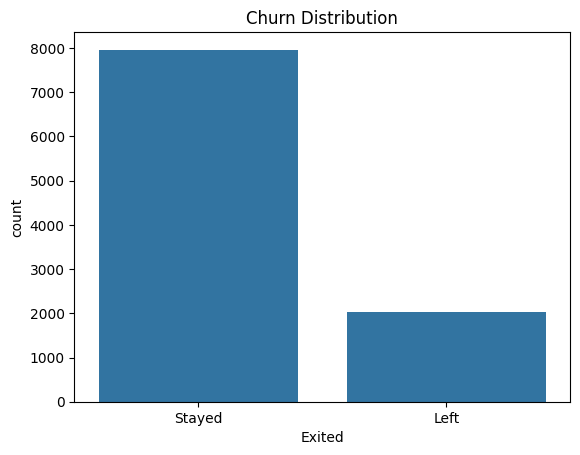

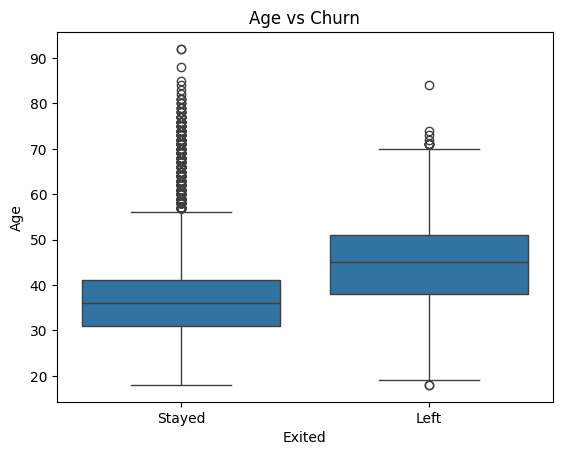

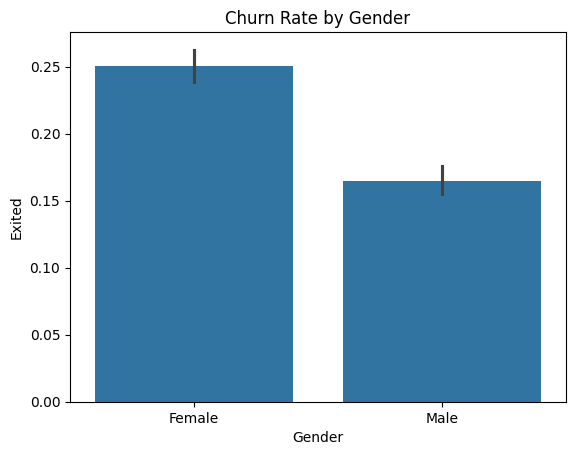

In [10]:
# Churn count
sns.countplot(x='Exited', data=df)
plt.title("Churn Distribution")
plt.xticks([0, 1], ['Stayed', 'Left'])
plt.show()

# Boxplot of Age vs Churn
sns.boxplot(x='Exited', y='Age', data=df)
plt.title("Age vs Churn")
plt.xticks([0, 1], ['Stayed', 'Left'])
plt.show()

# Churn rate by gender
sns.barplot(x='Gender', y='Exited', data=df)
plt.title("Churn Rate by Gender")
plt.xticks([0, 1], ['Female', 'Male'])
plt.show()


## Model Training & Evaluation

In [11]:
# Features and target
X = df.drop('Exited', axis=1)
y = df['Exited']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree model
clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8575

Confusion Matrix:
 [[1559   48]
 [ 237  156]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92      1607
           1       0.76      0.40      0.52       393

    accuracy                           0.86      2000
   macro avg       0.82      0.68      0.72      2000
weighted avg       0.85      0.86      0.84      2000



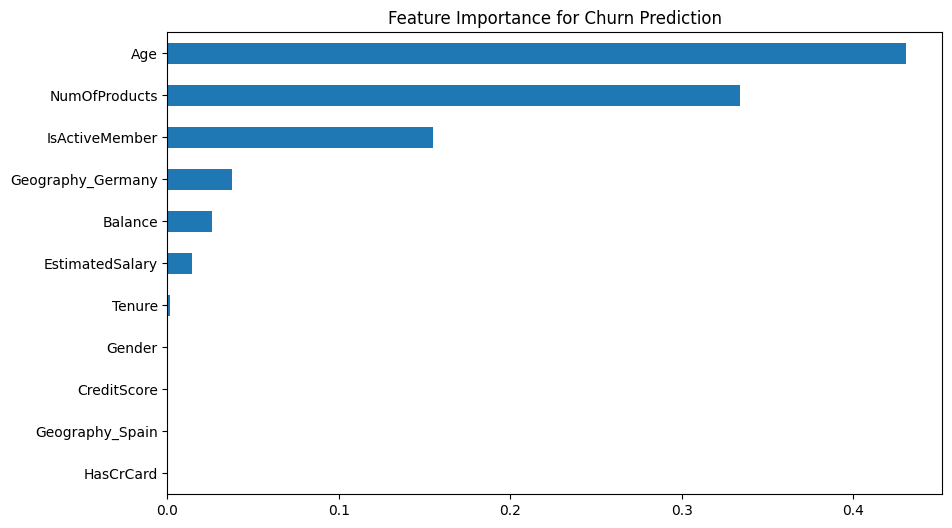

In [12]:
importances = pd.Series(clf.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=True)

# Plot
importances.plot(kind='barh', figsize=(10,6))
plt.title("Feature Importance for Churn Prediction")
plt.show()


## Conclusion
In this task, we:

Cleaned the churn dataset and encoded categorical variables.

Trained a Decision Tree classifier to predict customer churn.

Achieved a good balance of performance using basic model tuning.

Analyzed feature importance, finding that credit score, age, balance, and Geography_Germany were among the most influential features.

This model helps the bank understand why customers are leaving and can inform strategies to improve customer retention.